# The Nelder-Mead Algorithm, Downhill Simplex, or the Amoeba

**disclaimer: these notes are very much in their initial stages, typos and erros may be present.**

**notice: you do not have permission to distribute these notes** 

## Contents
* [Intro](#intro)
* [How it Works](#how_it_works)
* [Nelder-Mead Algorithm](#algorithm)
* [From Scratch Code](#amoeba_code)
* [SciPy fmin](#SciPy_method)
  

## References
* [Scholarpedia](http://www.scholarpedia.org/article/Nelder-Mead_algorithm).
* [Wikipedia](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

<a id = "intro"></a>
## Intro

The Nelder-Mead algorithm is a simple but useful method for numerically finding the approximate minimum of a function. 
Some benefits of the Nelder-Mead method: 
* derivative free, which makes it useful when the function is non-differentiable, discontinuous, or noisy
* it also goes by the name of the downhill simplex or amoeba method, which is just cool to say 

Some Disadvantages: 
* not too hot for high-dimensional problems 
* poor convergence (cannot take advantage of acceleration techniques associated with gradient-based methods)
* can get stuck in local minima 
* performance depends on the choice of reflection, contraction, and shrinkage parameters
* the initial simplex is important, an initial simplex chosen too small can get stuck in a local search

<a id = "how_it_works"></a>
## How it Works
We will just state the verbiage from [Wikipedia](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method).
Nelder–Mead in n dimensions maintains a set of n + 1 test points arranged as a simplex. It then extrapolates the behavior of the objective function measured at each test point in order to find a new test point and to replace one of the old test points with the new one, and so the technique progresses. The simplest approach is to replace the worst point with a point reflected through the centroid of the remaining n points. If this point is better than the best current point, then we can try stretching exponentially out along this line. On the other hand, if this new point isn't much better than the previous value, then we are stepping across a valley, so we shrink the simplex towards a better point. An intuitive explanation of the algorithm from "Numerical Recipes": [5]

*The downhill simplex method now takes a series of steps, most steps just moving the point of the simplex where the function is largest (“highest point”) through the opposite face of the simplex to a lower point. These steps are called reflections, and they are constructed to conserve the volume of the simplex (and hence maintain its nondegeneracy). When it can do so, the method expands the simplex in one or another direction to take larger steps. When it reaches a “valley floor”, the method contracts itself in the transverse direction and tries to ooze down the valley. If there is a situation where the simplex is trying to “pass through the eye of a needle”, it contracts itself in all directions, pulling itself in around its lowest (best) point.*

Well, we have to acknowledge that the [numerical recipes](https://numerical.recipes/) description is far superior to Wikipedia. That is likely why Wikipedia quoted numerical recipes and why so many scientists (including me) used numerical recipes for so many years. Before there was YouTube, there was numerical recipes, and it was so much better than YouTube.

<a id="algorithm"></a>
## Nelder-Mead Algorithm
Here is a version of the Nelder-Mead algorithm. This version is similar to the Wikipedia article but adapted to Python indexing. I acknowledge using the Wikipedia article to make this section of the notebook.  

----------

The goal is to minimize function $f(\mathbf x)$, where $\mathbf x \in \mathbb{R}^n$. 

Start with a guess, $\mathbf x_0, ~\mathbf x_1,~ \ldots,~ \mathbf x_{n-1}$.

1) Order the functions evaluations $f(\mathbf x_0) \leq f(\mathbf x_1) \leq \cdots \leq f(\mathbf x_{n-1})$. Check for convergence. If the convergence criteria is satisfied, stop the iteration

2) Calculate $\mathbf x_o = \frac{1}{n-1}\displaystyle \sum_{i=0}^{n-2} \mathbf x_i$, the centroid of all points except $\mathbf x_{n-1}$ (i.e., the worst one).

3) *Reflection*

Compute the reflected point $\mathbf x_r = \mathbf x_o + \alpha (\mathbf x_o - \mathbf x_{n-1})$ with $\alpha > 0$. If the reflected point is better than the second worst, but not better than the best, i.e. $f(\mathbf x_0) \leq f(\mathbf x_r) < f(\mathbf x_{n-2})$, then obtain a new simplex by replacing the worst point $\mathbf x_{n-1}$ with the reflected point $\mathbf x_r$, and go to step 1.

4) *Expansion*

If the reflected point is the best so far, $f(\mathbf x_r) < f(\mathbf x_0)$, then compute the expanded point $\mathbf x_e = \mathbf x_o + \gamma (\mathbf x_r - \mathbf x_o)$ with $\gamma > 1$. If the expanded point is better than the reflected point, $f(\mathbf x_e) < f(\mathbf x_r)$, then obtain a new simplex by replacing the worst point $\mathbf x_{n-1}$ with the expanded point $\mathbf x_e$ and go to step 1;
else obtain a new simplex by replacing the worst point $\mathbf x_{n+1}$ with the reflected point $\mathbf x_r$ and go to step 1.

5) *Contraction*

Here it is certain that $f(\mathbf x_r) \geq f(\mathbf x_{n-2})$. (Note that $\mathbf x_{n-2}$ is second or "next" to the worst point.)
If $f(\mathbf x_r) < f(\mathbf x_{n-1})$, then compute the contracted point on the outside $\mathbf x_c = \mathbf x_o + \rho(\mathbf x_{r} - \mathbf x_o)$ with $0 < \rho \leq 0.5$. If the contracted point is better than the reflected point, i.e. $f(\mathbf x_c) < f(\mathbf x_{r})$, then obtain a new simplex by replacing the worst point $\mathbf x_{n-1}$ with the contracted point $\mathbf x_c$ and go to step 1; else go to step 6. 

If $f(\mathbf x_r) \geq f(\mathbf x_{n-1})$, then compute the contracted point on the inside $\mathbf x_c = \mathbf x_o + \rho(\mathbf x_{n+1} - \mathbf x_o)$ with $0 < \rho \leq 0.5$. If the contracted point is better than the worst point, i.e. $f(\mathbf x_c) < f(\mathbf x_{n-1})$, then obtain a new simplex by replacing the worst point $\mathbf x_{n-1}$ with the contracted point $\mathbf x_c$ and go to step 1; else go to step 6. 

6) *Shrink* 

Replace all points except the best ($\mathbf x_0$) with $\mathbf x_i = \mathbf x_1 + \sigma(\mathbf x_i - \mathbf x_0)$ and go to step 1.

**Note**: $\alpha$, $\gamma$, $\rho$, and $\sigma$ are respectively the reflection, expansion, contraction, and shrink coefficients. Standard values are $\alpha = 1$, $\gamma = 2$, $\rho = 1/2$ and $\sigma = 1/2$.

For the *reflection*, since$\mathbf x_{n-1}$ is the vertex with the higher associated value among the vertices, we can expect to find a lower value at the reflection of $\mathbf x_{n-1}$ in the opposite face formed by all vertices $\mathbf x_i$ except $\mathbf x_{n-1}$.

For the *expansion*, if the reflection point $\mathbf x_r$ is the new minimum along the vertices, we can expect to find interesting values along the direction from $\mathbf x_o$ to $\mathbf x_r$.

Concerning the *contraction*, if $f(\mathbf x_r) > f(\mathbf x_{n-1})$, we can expect that a better value will be inside the simplex formed by all the vertices $\mathbf x_i$.

Finally, the *shrink* handles the rare case that contracting away from the largest point increases $f$, something that cannot happen sufficiently close to a non-singular minimum. In that case we contract towards the lowest point in the expectation of finding a simpler landscape. See the [Wikipedia](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method) or [Scholarpedia](http://www.scholarpedia.org/article/Nelder-Mead_algorithm) article for more details. 

<a id="amoeba_code"></a>
**From Scratch Code**
Below is an implementation of the Nelder-Mead algorithm. The code is tested on the [Himmelblau function](https://en.wikipedia.org/wiki/Himmelblau%27s_function). An animation of the simplex movement on the Himmelblau function is provided. 

In [2]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scipy.optimize import fmin

In [3]:
def amoeba(func, x0, step=0.1, no_improve_thr=1e-6, no_improv_break=10, max_iter=1000,
                alpha=1., gamma=2., rho=-0.5, sigma=0.5, verbose=False):
    """
    Finds the minimum of a function using the Nelder-Mead optimization algorithm.

    parameters:
        func (callable): The function to minimize. Must take a numpy array as input and return a scalar.
        x0 (numpy.ndarray): Initial guess for the minimum.
        step (float): Initial step size for creating the simplex.
        no_improve_thr (float): Threshold for considering no improvement.
        no_improv_break (int): Number of iterations with no improvement before stopping.
        max_iter (int): Maximum number of iterations.
        alpha (float): Reflection coefficient.
        gamma (float): Expansion coefficient.
        rho (float): Contraction coefficient.
        sigma (float): Shrink coefficient.
        verbose (bool): Whether to print iteration details.

    Returns:
        tuple: (best_solution, best_fitness, iterations, simplex history)
    """
    n = len(x0)

    # Initialize simplex
    simplex = np.zeros((n + 1, n))
    simplex[0] = x0
    for i in range(n):
        simplex[i + 1] = x0 + step * (np.eye(n)[i])

    # Evaluate initial simplex
    evaluations = [func(x) for x in simplex]

    iterations = 0
    no_improv_count = 0

    # list to collect simplex history 
    history=[]

    while iterations < max_iter:
        iterations += 1

        history.append(simplex)

        # Order by fitness
        sorted_indices = np.argsort(evaluations)
        evaluations = [evaluations[i] for i in sorted_indices]
        simplex = simplex[sorted_indices]

        best = simplex[0]
        
        if verbose:
            print(f"Iteration {iterations}: best_fitness = {evaluations[0]}")

        # Check for termination (no improvement)
        if abs(evaluations[-1] - evaluations[0]) < no_improve_thr:
            no_improv_count += 1
        else:
            no_improv_count = 0

        if no_improv_count >= no_improv_break:
            if verbose:
                print("Breaking due to no improvement.")
            break

        # Centroid of all points except the worst
        centroid = np.mean(simplex[:-1], axis=0)
        
        # Reflection
        reflected = centroid + alpha * (centroid - simplex[-1])
        reflected_evaluation = func(reflected)
        
        if evaluations[0] <= reflected_evaluation < evaluations[-2]:
            simplex[-1] = reflected
            evaluations[-1] = reflected_evaluation
            continue

        # Expansion
        if reflected_evaluation < evaluations[0]:
            expanded = centroid + gamma * (reflected - centroid)
            expanded_evaluation = func(expanded)
            if expanded_evaluation < reflected_evaluation:
                simplex[-1] = expanded
                evaluations[-1] = expanded_evaluation
            else:
                simplex[-1] = reflected
                evaluations[-1] = reflected_evaluation
            continue

        # Contraction
        if reflected_evaluation >= evaluations[-2]:
            contracted = centroid + rho * (simplex[-1] - centroid)
            contracted_evaluation = func(contracted)
            if contracted_evaluation < evaluations[-1]:
                simplex[-1] = contracted
                evaluations[-1] = contracted_evaluation
                continue
        
        # Shrink
        for i in range(1, n + 1):
            simplex[i] = simplex[0] + sigma * (simplex[i] - simplex[0])
            evaluations[i] = func(simplex[i])

    #Final sort to ensure best values are returned
    sorted_indices = np.argsort(evaluations)
    evaluations = [evaluations[i] for i in sorted_indices]
    simplex = simplex[sorted_indices]

    return simplex[0], evaluations[0], iterations, history

The Himmelblau function, below, is used to test optimization methods. The function has four local minima. 
\begin{equation} 
f(x,y) = (x^2 + y -11)^{2} + (x  + y^2-7)^2
\end{equation} 

We use the Himmelblau function to test the from-scratch code. A contour plot of the function and an animation of the simplex trajectory are provided below. 

In [4]:
def himmelblau(point):
    x,y=point
    return (x**2 + y - 11)**2 + (x +y**2 -7)**2

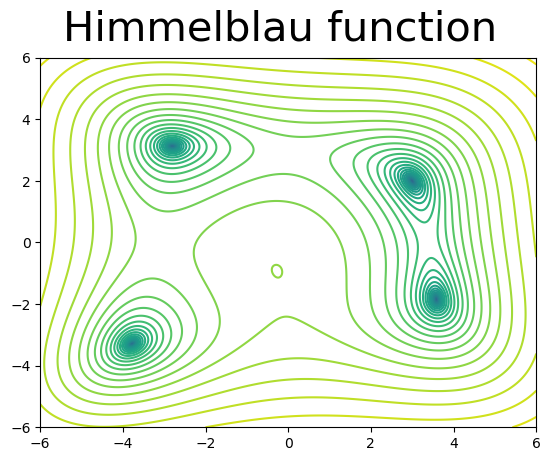

In [5]:
x=np.linspace(-6,6,1000)
y=np.linspace(-6,6,1000) 

fig=plt.figure()
fig.suptitle("Himmelblau function", size=30) 
ax=fig.add_subplot()

X,Y=np.meshgrid(x,y)
Z=himmelblau([X,Y]) 
ax.contour(X,Y,np.log(Z), levels=50) 

<a id = "animation"></a> 

In [6]:
fig=plt.figure(figsize=(6,6))
fig.suptitle("Himmelblau Function", size=30) 

ax=fig.add_subplot()
ax.set_xlabel("x", size=20) 
ax.set_ylabel("y", size=20) 

x=np.linspace(-5,5,1000)
y=np.linspace(-5,5,1000) 

X,Y=np.meshgrid(x,y)
Z=himmelblau([X,Y]) 
ax.contour(X,Y,np.log(Z), levels=50)

plt.close()

sol, f, count, hist=amoeba(himmelblau, np.array([0,0])) 
print("solution to Himmelblau function", sol) 

simplex, = ax.plot([], [], color="red") 

def init():
    
    simplex.set_data([], []) 
    return simplex, 

def ani_func(i):

    data=hist[i]

    x=data[:,0]
    y=data[:,1]
    x=np.r_[x, x[0]]
    y=np.r_[y, y[0]]

    simplex.set_data(x,y)
    return simplex, 

# no need to plot all the frames
n_frames=30
anim = animation.FuncAnimation(fig, ani_func, n_frames, interval=200, blit=True)
#anim.save("amoeba_himmelblau.mp4")


solution to Himmelblau function [2.99999978 2.00000696]


In [7]:
HTML(anim.to_html5_video())

<a id = "SciPy_method"></a> 
## How to use the amoeba method in SciPy
Well, this time around we won't code from scratch. We will simply get good at using the [fmin package from SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html). Here we go. 

**How to call fmin**
The fmin function needs two mandatory inputs: 
* the function to minimize, often called the objective function or sometimes the loss function
* the initial guess, an array of the same dimensions as the number of parameters needed for the objective function
Optional inputs are: 
* args, a tuple that are the additional (if needed) inputs to the objective function
* inputs related to setting tolerances, number of iterations, and maximum number of function evaluations 
I suggest one read the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) for full details. 


In [8]:
fmin(himmelblau,np.array([0,0]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 81
         Function evaluations: 157


array([3.00000632, 1.99996853])